<a href="https://colab.research.google.com/github/riquelima/Quarentena-de-Dados---GoogleColab--Pandas---Python/blob/master/DESAFIOS_AULA_1_QUARENTENA_DE_DADOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# < DESAFIOS - AULA 1 - QUARENTENA DE DADOS >
1. O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou? Determine quantos filmes não tem avaliações e quais são esses filmes. DONE

2. Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join. - DONE

3. Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

4. Arredondar as médias (coluna de nota média) para duas casas decimais.

5. Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

6. Contar o número de aparições de cada genero.

7. Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.












# Desafio 1 - O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou? Determine quantos filmes não tem avaliações e quais são esses filmes.

In [0]:
import pandas as pd
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv") #Dataframe Filmes
filmes.columns = ["filmeId", "titulo", "generos"] #Renomeando colunas do Dataframe Filmes

avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true") #Dataframe Avaliacoes
avaliacoes.columns = ["usuarioId","filmeId","nota","momento"] #Renomeando colunas do Dataframe Avaliacoes

notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean() #Calculando a média das notas por filme 

filmes_com_medias = filmes.join(notas_medias_por_filme, on ="filmeId") #Juntando Dataframe filmes + media de cada filme
filmes_com_medias.columns = ["filmeId", "titulo", "generos", "nota_media"]

selecao = filmes_com_medias['nota_media'].isnull()  # isnull() function detect missing values in the given series object. 

display(" ---------- Filmes sem Notas -------------")
filmes_com_medias[selecao]


#Desafio 2 - Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join:

In [0]:
import pandas as pd
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv") #Dataframe Filmes
filmes.columns = ["filmeId", "titulo", "generos"] #Renomeando colunas do Dataframe Filmes

avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true") #Dataframe Avaliacoes
avaliacoes.columns = ["usuarioId","filmeId","nota","momento"] #Renomeando colunas do Dataframe Avaliacoes

notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean() #Calculando a média das notas por filme 

filmes_com_medias = filmes.join(notas_medias_por_filme, on ="filmeId") #Juntando Dataframe filmes + media de cada filme
filmes_com_medias.columns = ["filmeId", "titulo", "generos", "nota_media"] # Renomeando coluna 'nota' para "nota_media"
filmes_com_medias.head(15)

# Renomeação poderia ser também dessa forma: filmes_com_media = filmes_com_media.rename(columns={'nota': 'nota_media'})






# Desafio 3 - Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [24]:
import pandas as pd
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv") #Dataframe Filmes
filmes.columns = ["filmeId", "titulo", "generos"] #Renomeando colunas do Dataframe Filmes

avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true") #Dataframe Avaliacoes
avaliacoes.columns = ["usuarioId","filmeId","nota","momento"] #Renomeando colunas do Dataframe Avaliacoes

total_votos_por_filme = avaliacoes.groupby('filmeId')['nota'].count() # counts the number of values in each column

filmes_com_medias = filmes.join(notas_medias_por_filme, on ="filmeId") #Juntando Dataframe filmes + media de cada filme
filmes_com_medias.columns = ["filmeId", "titulo", "generos", "nota_media"] # Renomeando coluna 'nota' para "nota_media"

filmes_com_medias_e_votos = filmes_com_medias.join(total_votos_por_filme, on="filmeId")
filmes_com_medias_e_votos.columns = ["filmeId", "titulo","generos", "nota_media", "total_votos"]
filmes_com_medias_e_votos.head()






,filmeId,titulo,generos,nota_media,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


# Desafio 4 - Arredondar as médias (coluna de nota média) para duas casas decimais.

In [37]:
import pandas as pd
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv") #Dataframe Filmes
filmes.columns = ["filmeId", "titulo", "generos"] #Renomeando colunas do Dataframe Filmes

avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true") #Dataframe Avaliacoes
avaliacoes.columns = ["usuarioId","filmeId","nota","momento"] #Renomeando colunas do Dataframe Avaliacoes

notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean() 
total_votos_por_filme = avaliacoes.groupby("filmeId")["nota"].count() # counts the number of values in each column

filmes_com_medias = filmes.join(notas_medias_por_filme, on ="filmeId") #Juntando Dataframe filmes + media de cada filme
filmes_com_medias.columns = ["filmeId", "titulo", "generos", "nota_media"] # Renomeando coluna 'nota' para "nota_media"

filmes_com_medias_e_votos = filmes_com_medias.join(total_votos_por_filme, on="filmeId")
filmes_com_medias_e_votos.columns = ["filmeId", "titulo","generos", "nota_media", "total_votos"]
filmes_com_medias_e_votos['nota_media'] = filmes_com_medias_e_votos['nota_media'].round(2) # round a DataFrame to a variable number of decimal places.
filmes_com_medias_e_votos


,filmeId,titulo,generos,nota_media,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50,1.0
9739,193585,Flint (2017),Drama,3.50,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50,1.0


# Desafio 5 - Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

In [0]:
import pandas as pd
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv") #Dataframe Filmes
filmes.columns = ["filmeId", "titulo", "generos"] #Renomeando colunas do Dataframe Filmes

avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true") #Dataframe Avaliacoes
avaliacoes.columns = ["usuarioId","filmeId","nota","momento"] #Renomeando colunas do Dataframe Avaliacoes

notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean() 
total_votos_por_filme = avaliacoes.groupby("filmeId")["nota"].count() # counts the number of values in each column

filmes_com_medias = filmes.join(notas_medias_por_filme, on ="filmeId") #Juntando Dataframe filmes + media de cada filme
filmes_com_medias.columns = ["filmeId", "titulo", "generos", "nota_media"] # Renomeando coluna 'nota' para "nota_media"

filmes_com_medias_e_votos = filmes_com_medias.join(total_votos_por_filme, on="filmeId")
filmes_com_medias_e_votos.columns = ["filmeId", "titulo","generos", "nota_media", "total_votos"]
filmes_com_medias_e_votos['nota_media'] = filmes_com_medias_e_votos['nota_media'].round(2) # round a DataFrame to a variable number of decimal places.

generos_filmes = filmes_com_medias_e_votos.generos.str.get_dummies('|') #"str. get_dummies()"" is used to separate each string in the caller series at the passed separator.
generos = generos_filmes.columns.to_list()

display(" ------------- Gêneros dos Filmes ----------------")
generos

# Desafio 6 - Contar o número de aparições de cada genero.

In [0]:
import pandas as pd
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv") #Dataframe Filmes
filmes.columns = ["filmeId", "titulo", "generos"] #Renomeando colunas do Dataframe Filmes

avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true") #Dataframe Avaliacoes
avaliacoes.columns = ["usuarioId","filmeId","nota","momento"] #Renomeando colunas do Dataframe Avaliacoes

notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean() 
total_votos_por_filme = avaliacoes.groupby("filmeId")["nota"].count() # counts the number of values in each column

filmes_com_medias = filmes.join(notas_medias_por_filme, on ="filmeId") #Juntando Dataframe filmes + media de cada filme
filmes_com_medias.columns = ["filmeId", "titulo", "generos", "nota_media"] # Renomeando coluna 'nota' para "nota_media"

filmes_com_medias_e_votos = filmes_com_medias.join(total_votos_por_filme, on="filmeId")
filmes_com_medias_e_votos.columns = ["filmeId", "titulo","generos", "nota_media", "total_votos"]
filmes_com_medias_e_votos['nota_media'] = filmes_com_medias_e_votos['nota_media'].round(2) # round a DataFrame to a variable number of decimal places.

total_filmes_por_genero = filmes_com_medias_e_votos.generos.str.get_dummies().sum() #Extrair a soma 

display(" --------- TOTAL DE FILMES POR GENERO ------------")
total_filmes_por_genero

# Desafio 7 - Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

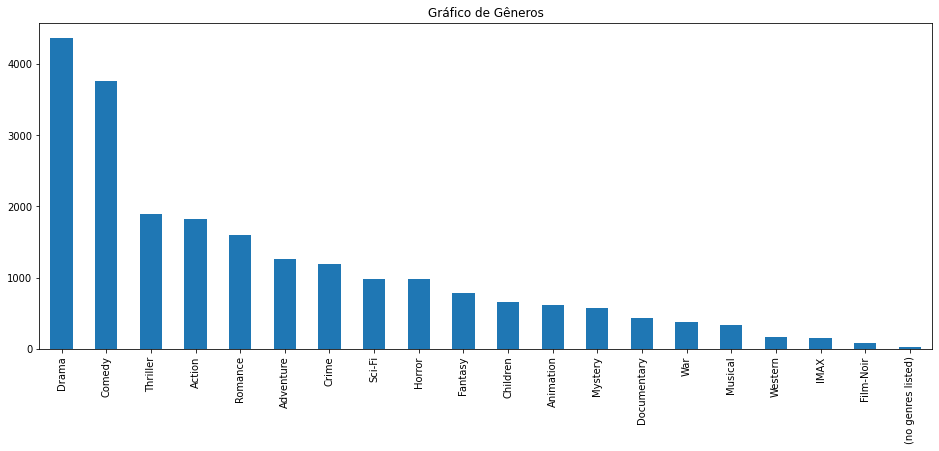

In [48]:
import pandas as pd
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv") #Dataframe Filmes
filmes.columns = ["filmeId", "titulo", "generos"] #Renomeando colunas do Dataframe Filmes

avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true") #Dataframe Avaliacoes
avaliacoes.columns = ["usuarioId","filmeId","nota","momento"] #Renomeando colunas do Dataframe Avaliacoes

notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean() 
total_votos_por_filme = avaliacoes.groupby("filmeId")["nota"].count() # counts the number of values in each column

filmes_com_medias = filmes.join(notas_medias_por_filme, on ="filmeId") #Juntando Dataframe filmes + media de cada filme
filmes_com_medias.columns = ["filmeId", "titulo", "generos", "nota_media"] # Renomeando coluna 'nota' para "nota_media"

filmes_com_medias_e_votos = filmes_com_medias.join(total_votos_por_filme, on="filmeId")
filmes_com_medias_e_votos.columns = ["filmeId", "titulo","generos", "nota_media", "total_votos"]
filmes_com_medias_e_votos['nota_media'] = filmes_com_medias_e_votos['nota_media'].round(2) # round a DataFrame to a variable number of decimal places.

total_filmes_por_genero = filmes_com_medias_e_votos.generos.str.get_dummies().sum() #Extrair a soma 
total_filmes_por_genero.sort_values(ascending=False).plot(kind='bar', figsize=(16, 6), title='Gráfico de Gêneros')
